# Assignement 2

This is your second assignement in the computer vision course. This time you are supposed to implement a system that outputs bounding boxes (bb) of pedestrians.

**Bounding box definition:** the smallest axis aligned rectangle containing all the pixels of the pedestrian

!!NO DEEP LEARNING APPROACHES ARE ALLOWED. You should use classic methods to address the assignment!!

Ouput format:
 - A list of [frame_id, bb_id, x, y, dx, dy]. See prenom_nom.py module for an example
 
Evaluation function:
 - Detections are converted into binary masks and we calculate the following metrics: intersecion over union. Note that this metric is not sensitive to the number of bb-s. You can find the code below for the evaluation.
 - The evaluation will be performed in an independent video sequence.
 
Scoring:
 - Your work will be evaluated as usual (complexity of the solution, clean implementation, well documented) **PLUS** the best 5 will receive +1 for the grade of the assignement.
 
You have to handle in:
 - Your code that is a single python module (possibly with requirements.txt or with a dockerfile). See the example prenom_nom.py. It has to implement the same interface, if it fails to run, your solution is considered failing.
 - Your report. Short summary of your algorithm, motivation for the algorithm used, failing cases, code and results (~1 page).
 
You should send your assignment by mail to maria.vakalopoulou@centralesupelec.fr, the name of the subject of the mail should be: VIC_Assignement2_name
 

In [103]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import argparse
import imutils
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
import glob
from tqdm import tqdm_notebook
import pickle

In [104]:
### Create a list with the path of all the images in the file img1
img_path = glob.glob('img1' + "/*.jpg")
img_path.sort()
img_path

['img1\\001.jpg',
 'img1\\002.jpg',
 'img1\\003.jpg',
 'img1\\004.jpg',
 'img1\\005.jpg',
 'img1\\006.jpg',
 'img1\\007.jpg',
 'img1\\008.jpg',
 'img1\\009.jpg',
 'img1\\010.jpg',
 'img1\\011.jpg',
 'img1\\012.jpg',
 'img1\\013.jpg',
 'img1\\014.jpg',
 'img1\\015.jpg',
 'img1\\016.jpg',
 'img1\\017.jpg',
 'img1\\018.jpg',
 'img1\\019.jpg',
 'img1\\020.jpg',
 'img1\\021.jpg',
 'img1\\022.jpg',
 'img1\\023.jpg',
 'img1\\024.jpg',
 'img1\\025.jpg',
 'img1\\026.jpg',
 'img1\\027.jpg',
 'img1\\028.jpg',
 'img1\\029.jpg',
 'img1\\030.jpg',
 'img1\\031.jpg',
 'img1\\032.jpg',
 'img1\\033.jpg',
 'img1\\034.jpg',
 'img1\\035.jpg',
 'img1\\036.jpg',
 'img1\\037.jpg',
 'img1\\038.jpg',
 'img1\\039.jpg',
 'img1\\040.jpg',
 'img1\\041.jpg',
 'img1\\042.jpg',
 'img1\\043.jpg',
 'img1\\044.jpg',
 'img1\\045.jpg',
 'img1\\046.jpg',
 'img1\\047.jpg',
 'img1\\048.jpg',
 'img1\\049.jpg',
 'img1\\050.jpg',
 'img1\\051.jpg',
 'img1\\052.jpg',
 'img1\\053.jpg',
 'img1\\054.jpg',
 'img1\\055.jpg',
 'img1\\05

In [105]:
### Background Subtraction of all the image in the file and create image_bis
img_path_ = list()
fgbg = cv2.createBackgroundSubtractorMOG2()
if not os.path.exists('img1_bis'):
    os.mkdir('img1_bis')
# Computing background
for id_im, im_path in enumerate(img_path):
    print("Frame #" + str(id_im) + '/' + str(len(img_path)), end="\r")
    im = cv2.imread(im_path)
    fgmask = fgbg.apply(im)   
    img_path_.append('img1_bis' + '/' + '{:03d}'.format(id_im)+ '.jpg')
    cv2.imwrite('img1_bis' + '/' + '{:03d}'.format(id_im)+ '.jpg', np.expand_dims((fgmask>0), axis=-1)*im)
dic_Paths = dict((path_bis,path) for (path_bis,path) in zip(img_path_,img_path))

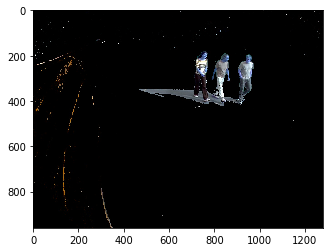

In [106]:
imagePath = 'img1_bis/340.jpg'
image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

In [107]:
###pedestrian detection using HOG and SVM
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
dic_img_box = dict()
threshold = 0.5
for path in tqdm_notebook(img_path_):
    solution = []
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)

    orig = image.copy()

    #playing with winStride impact the performance, setting it to 7,7 allows us to have 
        #a score of 24%
    (rects, weights) = hog.detectMultiScale(image, winStride=(7,7),padding=(8, 8), scale=1.05)
    #new_rects , new_weights = rects.copy(), weights.copy()
    Del =list()
    for i in range(len(rects)) :
        x,y,w,h = rects[i,:]
        if weights[i,0]<threshold:
            #cv2.rectangle(orig, (x, y), (x+w, y+h), (0, 255, 0), 10)
            Del.append(i)
    rects , weights = np.delete(rects, Del, 0), np.delete(weights, Del,0)
        #cv2_imshow('Pedestrians', frame)
    #plt.imshow(orig)
    #plt.show()'''

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

        # draw the final bounding boxes
    '''
    count = 1
    for (xA, yA, xB, yB) in pick:
            #solution.append([i,count,xA,yA,xB-xA,yB-yA])
            count += 1
            cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 10)
    plt.imshow(image)
    plt.show()'''
    dic_img_box[path] = pick

In [108]:
## Exporting as pickle
pickle.dump(dic_img_box, open('dic_img_box_' + '{}'.format(threshold)+ '.p', "wb"))

In [109]:
dic_img_box = pickle.load(open('dic_img_box_' + '{}'.format(threshold)+ '.p','rb'))

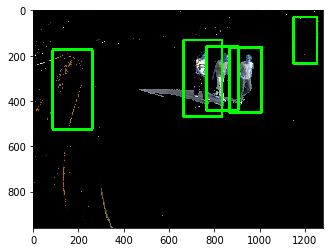

In [110]:
imagePath = 'img1_bis/340.jpg'
image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
for (xA, yA, xB, yB) in dic_img_box[imagePath]:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 10)
plt.imshow(image)
plt.show()

In [111]:
###Load the image, get the contour of the shape in it and check if they are human-shape like 
###and returns boxes that could be human in shape
dic_img_human = dict()
for path in tqdm_notebook(img_path_):
    im = cv2.imread(path)
    orig = im.copy()
    height, width = im.shape[:2]
    new_width = 500
    new_height = new_width*height//width
    im = cv2.resize(im,(new_width, new_height), interpolation = cv2.INTER_CUBIC)

    # Change to gray and apply both gaussian and threshold filter
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blurred_im = cv2.GaussianBlur(im_gray, (1, 1), 0)
    ret,thresh = cv2.threshold(blurred_im, 220, 255, 0)

    # Compute contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print( contours)
    # Get dimension of main contours
    human_boxes = []
    for cnt in contours:

        # Compute area size
        area = cv2.contourArea(cnt)
        if area > 3: #Chosen after studying are of tarpaulin
            # remove overdimension of contours

            cnt_low = cnt[:, 0]

            # contour width
            x_max = np.max(cnt_low[:, 0])*width//new_width
            x_min = np.min(cnt_low[:, 0])*width//new_width
            # contour height
            y_max = np.max(cnt_low[:, 1])*height//new_height
            y_min = np.min(cnt_low[:, 1])*height//new_height
            #cv2.rectangle(orig, (x_min, y_min), (x_max, y_max), (0, 255, 0), 10)
            human_boxes.append([x_min, y_min, x_max, y_max])

    #plt.imshow(orig)
    #plt.show()
    dic_img_human[path]= human_boxes

In [112]:
## Exporting as pickle
pickle.dump(dic_img_human, open("dic_img_human.p", "wb"))

In [113]:
dic_img_human = pickle.load(open('dic_img_human.p','rb'))

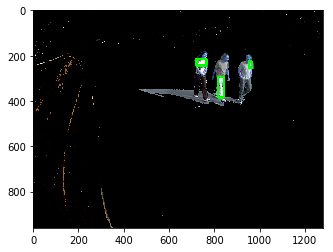

In [114]:
imagePath = 'img1_bis/340.jpg'
image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
for (xA, yA, xB, yB) in dic_img_human[imagePath]:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 10)
plt.imshow(image)
plt.show()

In [115]:
def doOverlap(box1, box2): 
# Returns true if two rectangles(l1, r1)  
# and (l2, r2) overlap       
    # If one rectangle is on left side of other 
    if(box1[0] > box2[2] or box2[0] > box1[2]): 
        return False
  
    # If one rectangle is above other 
    if(box1[1] >box2[3] or box2[1] > box1[3]): 
        return False
  
    return True

if not os.path.exists('img1_boxes'):
    os.mkdir('img1_boxes')
dic_final_boxes = dict()
for (id_im,path) in tqdm_notebook(enumerate(dic_img_box.keys())):
    pick = dic_img_box[path]
    pick_ = np.copy(pick)
    Del= list()
    for i,box1 in enumerate(pick):
        overlap = [doOverlap(box1, box2) for box2 in dic_img_human[path]]
        if sum(overlap)==0:
            Del.append(i)
    pick_=np.delete(pick_,Del,0)
    dic_final_boxes[dic_Paths[path]] = pick_
    image = cv2.imread(dic_Paths[path], cv2.IMREAD_UNCHANGED)
    for (xA, yA, xB, yB) in pick_:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 10)
    cv2.imwrite('img1_boxes' + '/' + '{:03d}'.format(id_im)+ '.jpg', image)

    '''
    plt.imshow(image)
    plt.show()'''

In [116]:
## Exporting as pickle
pickle.dump(dic_final_boxes, open('dic_final_boxes_' + '{}'.format(threshold)+ '.p', "wb"))

In [117]:
dic_final_boxes = pickle.load(open('dic_final_boxes_' + '{}'.format(threshold)+ '.p','rb'))

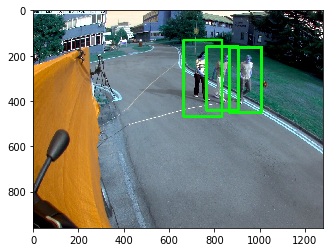

In [118]:
imagePath = 'img1_boxes/340.jpg'
image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

In [119]:
bounding_boxes = list()
for frame_id, frame_path in enumerate(list(img_path)):
    for bb_id, box in enumerate(dic_final_boxes[frame_path]):
        bounding_boxes.append([frame_id, bb_id, box[0], box[1], box[2]-box[0],box[3]-box[1]])


A perfect score... 1.0


A great score! 0.1772088325878298


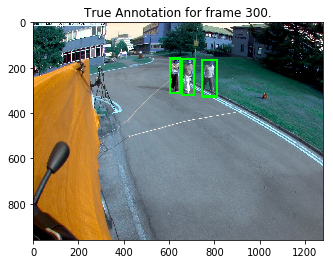

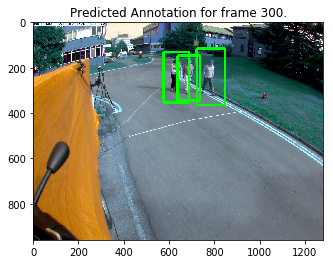

In [120]:
data_root = './img1/'
gt_path = './gt/gt.txt'

_W = 1280
_H = 960
_N = 684 # number of frames

def format_id(frame):
    assert _N >= frame
    return '{:03d}'.format(frame)


def read_frame(root, frame):
    """Read frames and create integer frame_id-s"""
    assert _N >= frame
    return cv2.imread(os.path.join(root,format_id(frame)+'.jpg'), cv2.IMREAD_UNCHANGED)
    

def read_gt(filename):
    """Read gt and create list of bb-s"""
    assert os.path.exists(filename)
    with open(filename, 'r') as file:
        lines = file.readlines()
    # truncate data (last columns are not needed)
    return [list(map(lambda x: int(x), line.split(',')[:6])) for line in lines]


def annotations_for_frame(solution, frame):
    assert _N >= frame
    return [bb for bb in solution if int(bb[0])==int(frame)]


def evaluate_solution(gt, solution, N):
    """Caclulate evaluation metric"""
    score = []
    #for frame in [300]:
    for frame in tqdm_notebook(range(1, N)):
        bbs_sol = annotations_for_frame(solution, frame)
        bbs_gt = annotations_for_frame(gt, frame)
        black_sol = np.zeros((_H, _W))
        black_gt = np.zeros((_H, _W))
        for bb in bbs_sol:
            x, y = bb[2:4]
            dx, dy = bb[4:6]
            cv2.rectangle(black_sol, (x, y), (x+dx, y+dy), (255), -1)
        for bb in bbs_gt:
            x, y = bb[2:4]
            dx, dy = bb[4:6]
            cv2.rectangle(black_gt, (x, y), (x+dx, y+dy), (255), -1)
        # intersection over union
        intersection = black_sol * black_gt
        intersection[intersection > 0.5] = 1
        union = black_sol + black_gt
        union[union > 0.5] = 1
        if not union.any():
            continue
        score.append(intersection.sum()/union.sum())
        
        
    return np.asarray(score).mean()
    

def show_annotation(solution, frame, title):
    assert _N >= frame
    im = read_frame(data_root, frame)
    bbs = annotations_for_frame(solution, frame)
    for bb in bbs:
        x, y = bb[2:4]
        dx, dy = bb[4:6]
        cv2.rectangle(im, (x, y), (x+dx, y+dy), (0,255,0), 10)
    plt.imshow(im)
    plt.title( title + ' for frame {}.'.format(frame))
    plt.show()
    return

gt = read_gt(gt_path)



print('A perfect score... {}'.format(evaluate_solution(gt, gt, _N)))

# your solution will be tested simply by changing the dataset
# and changing the module, i.e., the following has to work 
# with simply using your module 
#sol = yourname.pedestrians(data_root, _W, _H, _N)
print('A great score! {}'.format(evaluate_solution(bounding_boxes, gt, _N)))
show_annotation(gt, 300, 'True Annotation')
show_annotation(bounding_boxes, 300, 'Predicted Annotation')
